<a href="https://colab.research.google.com/github/azragundogan/DSA210_Project/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Group means:
                 Entertainment_min  Communication_min  Total_Screen_min
Exam_day_or_not                                                        
0                       221.803571          52.803571            393.75
1                       239.964286          44.750000            390.00


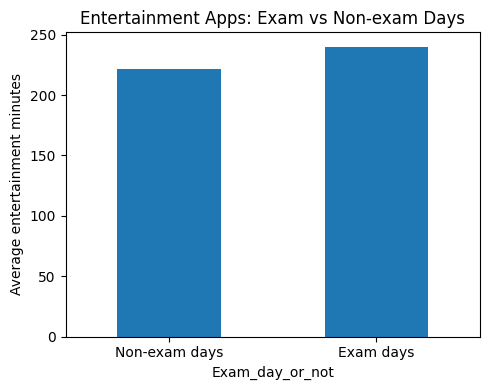

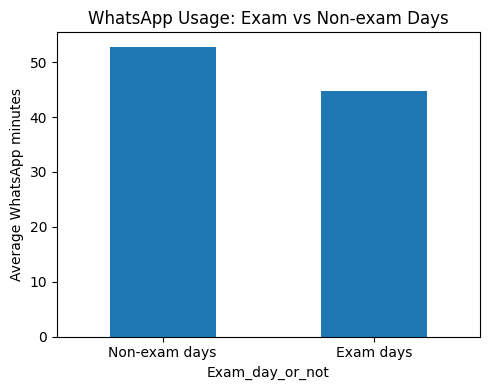

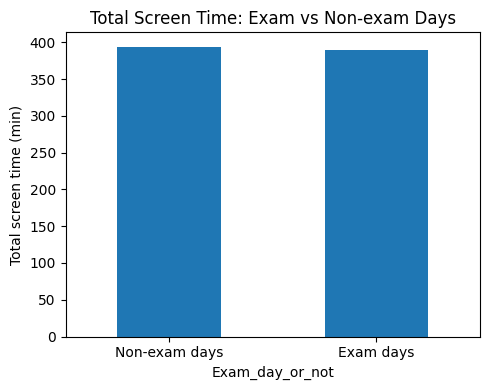


Entertainment t-stat: 0.919040278498386 p-value: 0.3601027757083002
Communication t-stat: -1.2095367591394859 p-value: 0.22935171167478302

Summary:
      Group  Entertainment_mean  Communication_mean  Total_screen_mean
0  Non-exam          221.803571           52.803571             393.75
1      Exam          239.964286           44.750000             390.00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

try:
    get_ipython
    %matplotlib inline
except NameError:
    pass


df = pd.read_excel("DSA_210_Dataset.xlsx")


df.columns = df.columns.str.strip()




df["Entertainment_min"] = df["Instagram_min"] + df["TikTok_min"] + df["YouTube_min"]
df["Communication_min"] = df["WhatsApp_min"]

#df.head()
#df.info()
#df.describe()


group_means = df.groupby("Exam_day_or_not")[[
    "Entertainment_min",
    "Communication_min",
    "Total_Screen_min"
]].mean()

print("\nGroup means:")
print(group_means)

labels = ["Non-exam days", "Exam days"]


group_means["Entertainment_min"].plot(kind="bar", rot=0, figsize=(5,4))
plt.xticks([0,1], labels)
plt.ylabel("Average entertainment minutes")
plt.title("Entertainment Apps: Exam vs Non-exam Days")
plt.tight_layout()
plt.show()


group_means["Communication_min"].plot(kind="bar", rot=0, figsize=(5,4))
plt.xticks([0,1], labels)
plt.ylabel("Average WhatsApp minutes")
plt.title("WhatsApp Usage: Exam vs Non-exam Days")
plt.tight_layout()
plt.show()


group_means["Total_Screen_min"].plot(kind="bar", rot=0, figsize=(5,4))
plt.xticks([0,1], labels)
plt.ylabel("Total screen time (min)")
plt.title("Total Screen Time: Exam vs Non-exam Days")
plt.tight_layout()
plt.show()


ent_exam = df[df["Exam_day_or_not"] == 1]["Entertainment_min"]
ent_non  = df[df["Exam_day_or_not"] == 0]["Entertainment_min"]

com_exam = df[df["Exam_day_or_not"] == 1]["Communication_min"]
com_non  = df[df["Exam_day_or_not"] == 0]["Communication_min"]

t_ent, p_ent = ttest_ind(ent_exam, ent_non, equal_var=False)
t_com, p_com = ttest_ind(com_exam, com_non, equal_var=False)

print("\nEntertainment t-stat:", t_ent, "p-value:", p_ent)
print("Communication t-stat:", t_com, "p-value:", p_com)

summary = pd.DataFrame({
    "Group": ["Non-exam", "Exam"],
    "Entertainment_mean": [ent_non.mean(), ent_exam.mean()],
    "Communication_mean": [com_non.mean(), com_exam.mean()],
    "Total_screen_mean": [
        df[df["Exam_day_or_not"] == 0]["Total_Screen_min"].mean(),
        df[df["Exam_day_or_not"] == 1]["Total_Screen_min"].mean()
    ]
})

print("\nSummary:")
print(summary)


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_excel("DSA_210_Dataset.xlsx")

df.columns = df.columns.str.strip()

if "Communication_min:" in df.columns and "Communication_min" not in df.columns:
    df = df.rename(columns={"Communication_min:": "Communication_min"})

if "Communication_min:" in df.columns and "Communication_min" in df.columns:
    df = df.drop(columns=["Communication_min:"])

required = ["Entertainment_min", "Communication_min", "Total_Screen_min", "Exam_day_or_not"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns: {missing}")

df_model = df[required].dropna().copy()
df_model["Exam_day_or_not"] = df_model["Exam_day_or_not"].astype(int)

X = df_model[["Entertainment_min", "Communication_min", "Total_Screen_min"]]
y = df_model["Exam_day_or_not"]

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42, stratify=y
    )
except ValueError:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": model.coef_[0]
}).sort_values("coefficient", ascending=False)

print(coef_df)


Accuracy: 0.391304347826087
Confusion Matrix:
 [[5 7]
 [7 4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.42      0.42        12
           1       0.36      0.36      0.36        11

    accuracy                           0.39        23
   macro avg       0.39      0.39      0.39        23
weighted avg       0.39      0.39      0.39        23

             feature  coefficient
0  Entertainment_min     0.002527
2   Total_Screen_min    -0.001566
1  Communication_min    -0.006323
